<a href="https://colab.research.google.com/github/ParineetaDeb/ParineetaDeb/blob/main/Copy_of_OPERATIONS_1_AND_2(MEDICAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbDlYalpaazFHanNDY25VVWdlVDFuWEczT2lld3xBQ3Jtc0treVpmTkdGOGdJckdVSUhzbjVVdFp6SVJDcjcwa2Y4VjhOSFBnSy1yV2RtcWJaWm5vRXBlSE83M3JEQ2dZUUZrbU14azUxZTFhcDBaU3ZTajdOd1NReG5tQ01zV0haUkVCUWctZDFVUzROVlhQTWhOUQ&q=https%3A%2F%2Fcolab.research.google.com%2Fdrive%2F1GqZu6zmCy2vMNMZqO78DDuHvwv_9vJcp%3Fusp%3Dsharing&v=MHTsS0XEx8E

# **OPERATION ONE**



In [ ]:
#Importing necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
#mounted from the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#linking with respective path directory
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_Record/data/Dataset.csv')

In [ ]:
#displaying the dataset
df

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,25,0,113911


In [ ]:
#demensions of my data
df.shape

(1552210, 44)

In [ ]:
#first five rows
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
#All info my daset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [ ]:
#removing unwanted columns
df = df.drop(columns=['Unnamed: 0', 'Patient_ID'])

In [ ]:
#Again the full info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

In [ ]:
#Displaying only columns
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
#replacing missing values with zero
df.fillna(0, inplace=True)

In [ ]:
#Updated first five rows
df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,0.0,0.0,-0.02,1,0
1,1,65.0,100.0,0.0,0.0,72.0,0.0,16.5,0.0,0.0,...,0.0,0.0,0.0,68.54,0,0.0,0.0,-0.02,2,0
2,2,78.0,100.0,0.0,0.0,42.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,0.0,0.0,-0.02,3,0
3,3,73.0,100.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,0.0,0.0,-0.02,4,0
4,4,70.0,100.0,0.0,129.0,74.0,69.0,14.0,0.0,0.0,...,11.3,0.0,330.0,68.54,0,0.0,0.0,-0.02,5,0


In [ ]:
#Last five rows
df.tail()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
1552205,21,83.0,99.0,0.0,121.0,77.0,54.0,22.0,0.0,0.0,...,0.0,0.0,0.0,88.0,0,1.0,0.0,-2.93,22,0
1552206,22,80.0,92.0,0.0,102.0,73.0,51.0,24.0,0.0,0.0,...,0.0,0.0,0.0,88.0,0,1.0,0.0,-2.93,23,0
1552207,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,0.0,0.0,...,0.0,0.0,0.0,88.0,0,1.0,0.0,-2.93,24,0
1552208,24,104.0,99.0,0.0,127.0,85.0,59.0,24.0,0.0,0.0,...,0.0,0.0,0.0,88.0,0,1.0,0.0,-2.93,25,0
1552209,25,94.5,99.0,0.0,112.0,81.0,56.0,22.0,0.0,0.0,...,0.0,0.0,0.0,88.0,0,1.0,0.0,-2.93,26,0


In [ ]:
#Spliting my data into Features and targets or labels
x = df.drop(columns=['SepsisLabel'])
y = df['SepsisLabel']

In [ ]:
#counting the data as values to know its balance
print('Bofore SMOTE class distribution (%)')
print(y.value_counts())


Bofore SOMOTE class distribution (%)
SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64


In [ ]:
#counting the data as percentage to know its balance
print("\nClass Distribution (%):")
print(y.value_counts(normalize=True) * 100)


Class Distribution (%):
SepsisLabel
0    98.201532
1     1.798468
Name: proportion, dtype: float64


In [ ]:
#Applying SMOTE function to balance the data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
#Counting the data as values after balancing
print("After SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())


After SMOTE class distribution:
SepsisLabel
0    1524294
1    1524294
Name: count, dtype: int64


In [ ]:
#Counting the data as percentages after balancing
print("\nClass Distribution (%):")
print(y_resampled.value_counts(normalize=True) * 100)


Class Distribution (%):
SepsisLabel
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
#Checking the amount of dataset you have.
print("Total samples after SMOTE:", x_resampled.shape[0])

Total samples after SMOTE: 3048588


In [ ]:
#Reducing the sample set.
from sklearn.utils import shuffle
x_resampled, y_resampled = shuffle(x_resampled, y_resampled, random_state=42)
x_small = x_resampled[:1000]
y_small = y_resampled[:1000]

In [ ]:
  #Training and testing of datasts, by using the reduced sample size.
  x_train, x_test, y_train, y_test = train_test_split(x_small, y_small, test_size=0.2, random_state=42)

In [ ]:
# Standardize features by removing the mean and scaling to unit variance (z-score normalization)
# Fit the scaler on training data and apply it to both training and test sets
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Predict and compare the accuracy of 5 Machine Learning (ML) algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Train and evaluate multiple classification models, then print their accuracy scores on the test set
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.6995
Decision Tree Accuracy: 0.7990
Random Forest Accuracy: 0.8665
Support Vector Machine Accuracy: 0.7440
K-Nearest Neighbors Accuracy: 0.7065


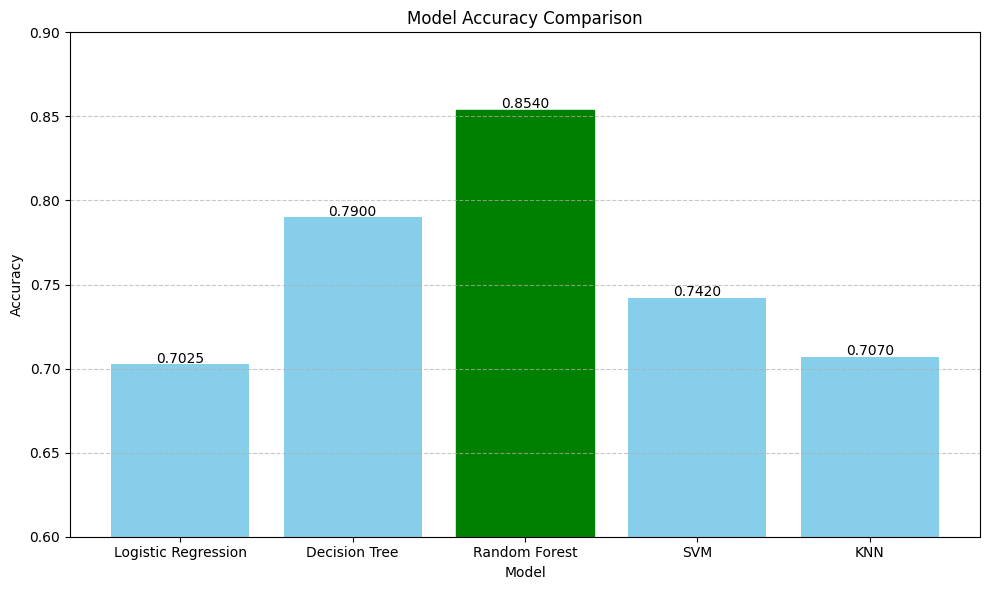

In [ ]:
 import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [0.7025, 0.7900, 0.8540, 0.7420, 0.7070]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# Highlight the best model
max_index = accuracies.index(max(accuracies))
bars[max_index].set_color('green')

plt.ylim(0.6, 0.90)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **OPERATION TWO**

In [ ]:
# Convert your dataset features to strings
df_str = df.astype(str)

In [ ]:
 # Create a list of sentences describing patient data, masking the Glucose level
# with [MASK] if the Glucose value is missing ('nan') as a string.
 masked_sentences = []

for idx, row in df_str.iterrows():
    if row['Glucose'].lower() == 'nan':
        sentence = f"The patient has HR {row['HR']}, Temp {row['Temp']}, and Glucose level [MASK]."
    else:
        sentence = f"The patient has HR {row['HR']}, Temp {row['Temp']}, and Glucose level {row['Glucose']}."
    masked_sentences.append(sentence)


In [ ]:
# Importing the pipeline module from the transformers library
from transformers import pipeline

# Initialize BERT and RoBERTa fill-mask pipelines with their respective models
bert = pipeline("fill-mask", model="bert-base-uncased")
roberta = pipeline("fill-mask", model="roberta-base")

# Lists to store predictions for BERT and RoBERTa
bert_predictions = []
roberta_predictions = []

# Loop over each sentence in the list 'masked_sentences'
for sentence in masked_sentences:

    # Check if the sentence contains the '[MASK]' token for prediction
    if '[MASK]' in sentence:
        # Make predictions using both BERT and RoBERTa pipelines for the masked token
        bert_pred = bert(sentence)[0]['token_str']
        roberta_pred = roberta(sentence)[0]['token_str']
    else:
        # If there is no mask, extract the glucose level value from the sentence (after 'Glucose level ')
        # Remove any trailing periods for consistency
        bert_pred = roberta_pred = sentence.split('Glucose level ')[-1].replace('.', '')

    # Append the predictions to their respective lists
    bert_predictions.append(bert_pred)
    roberta_predictions.append(roberta_pred)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Convert BERT and RoBERTa model predictions to numeric values.
# If a prediction cannot be converted (e.g., due to non-numeric content), it is replaced with NaN.
df['Glucose_BERT'] = pd.to_numeric(bert_predictions, errors='coerce')
df['Glucose_RoBERTa'] = pd.to_numeric(roberta_predictions, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1552210 non-null  float64
 2   O2Sat             1552210 non-null  float64
 3   Temp              1552210 non-null  float64
 4   SBP               1552210 non-null  float64
 5   MAP               1552210 non-null  float64
 6   DBP               1552210 non-null  float64
 7   Resp              1552210 non-null  float64
 8   EtCO2             1552210 non-null  float64
 9   BaseExcess        1552210 non-null  float64
 10  HCO3              1552210 non-null  float64
 11  FiO2              1552210 non-null  float64
 12  pH                1552210 non-null  float64
 13  PaCO2             1552210 non-null  float64
 14  SaO2              1552210 non-null  float64
 15  AST               1552210 non-null  float64
 16  

In [ ]:
# Define a dictionary of classification models to be evaluated.
# Each key is the model name (as a string), and the value is the corresponding sklearn classifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
features = ['HR', 'Temp', 'Age']  # You can add more

In [ ]:
for version in ['Glucose_BERT', 'Glucose_RoBERTa']:
    print(f"\nAccuracy using {version}:")
    X = df[features + [version]].dropna()
    y = df.loc[X.index, 'SepsisLabel']


Accuracy using Glucose_BERT:

Accuracy using Glucose_RoBERTa:


In [ ]:
# Split the dataset into training and testing sets.
# 80% of the data is used for training, and 20% for testing.
# random_state ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
  # Standardize the feature data to have zero mean and unit variance.
  # Fit the scaler on the training data and transform both training and testing sets.
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

In [ ]:
# Check the size of the training and test sets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (1241768, 4)
Test data shape: (310442, 4)


In [ ]:
x_train_subset = x_train.sample(n=10000, random_state=42)  # Sample 10,000 rows
y_train_subset = y_train.loc[x_train_subset.index]  # Ensure corresponding labels are selected


In [ ]:
x_test_subset = x_test.sample(n=5000, random_state=42)  # Sample 5,000 rows
y_test_subset = y_test.loc[x_test_subset.index]  # Ensure corresponding labels are selected


In [ ]:
# Check the size of the training and test sets after reduction
print(f"Training data shape: {x_train_subset.shape}")
print(f"Test data shape: {x_test_subset.shape}")

Training data shape: (10000, 4)
Test data shape: (5000, 4)


In [ ]:
# Train and evaluate
for name, model in models.items():
    model.fit(x_train_subset, y_train_subset)
    preds = model.predict(x_test_subset)
    acc = accuracy_score(y_test_subset, preds)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9830
Decision Tree Accuracy: 0.9638
Random Forest Accuracy: 0.9796
SVM Accuracy: 0.9830
KNN Accuracy: 0.9824


Logistic Regression Accuracy: 0.9830
Decision Tree Accuracy: 0.9644
Random Forest Accuracy: 0.9800
SVM Accuracy: 0.9830
KNN Accuracy: 0.9824


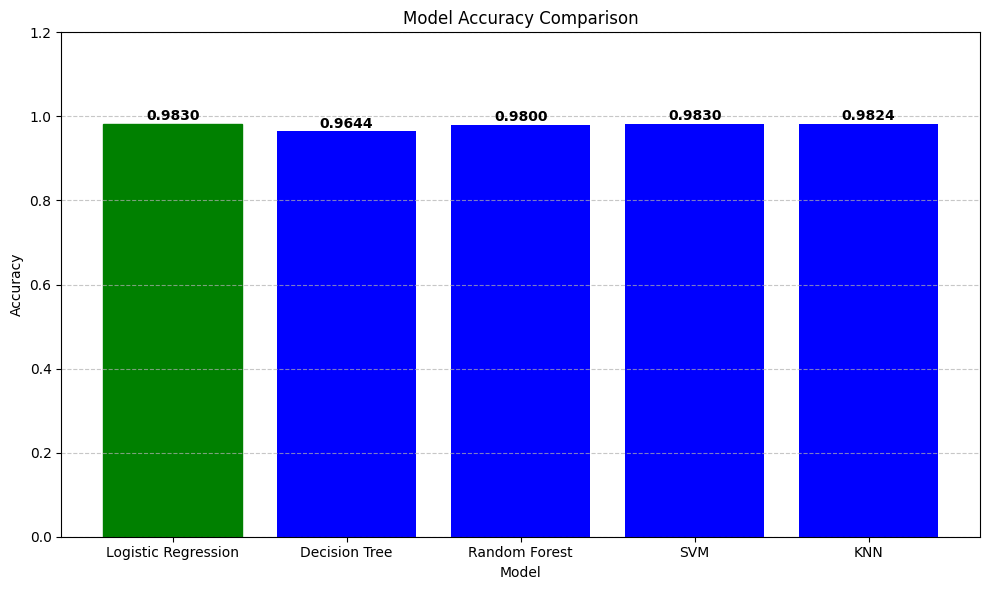

The best model is: Logistic Regression with an accuracy of 0.9830


In [ ]:
 import matplotlib.pyplot as plt

# Store results
accuracies = {}

for name, model in models.items():
    model.fit(x_train_subset, y_train_subset)
    preds = model.predict(x_test_subset)
    acc = accuracy_score(y_test_subset, preds)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model = max(accuracies, key=accuracies.get)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='Blue')

# Highlight the best model
best_model_index = list(accuracies.keys()).index(best_model)  # Convert to list to get index
bars[best_model_index].set_color('Green')  # Highlight with a different color

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.4f}',
             ha='center', va='bottom', fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1.2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]:.4f}")


Logistic Regression Accuracy: 0.9830
Decision Tree Accuracy: 0.9636
Random Forest Accuracy: 0.9800
SVM Accuracy: 0.9830
KNN Accuracy: 0.9824


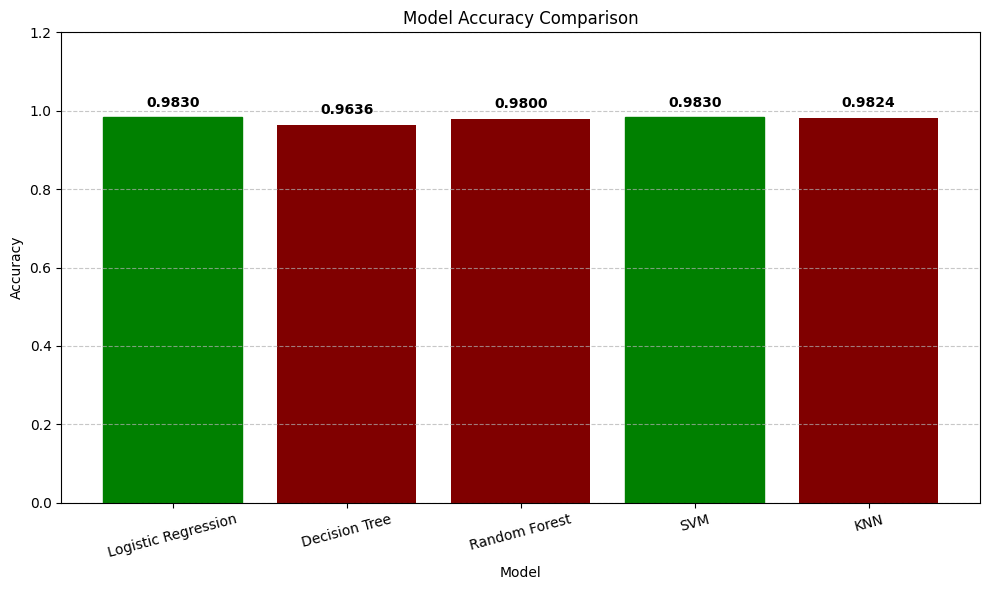

The best model(s): Logistic Regression, SVM with an accuracy of 0.9830


In [ ]:

 import matplotlib.pyplot as plt

# Store results
accuracies = {}

for name, model in models.items():
    model.fit(x_train_subset, y_train_subset)
    preds = model.predict(x_test_subset)
    acc = accuracy_score(y_test_subset, preds)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model(s)
best_accuracy = max(accuracies.values())
best_models = [name for name, acc in accuracies.items() if acc == best_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='maroon')

# Highlight all best models
for bar in bars:
    if bar.get_x() in [bars[list(accuracies.keys()).index(name)].get_x() for name in best_models]:
        bar.set_color('green')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}',
             ha='center', va='bottom', fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1.2)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"The best model(s): {', '.join(best_models)} with an accuracy of {best_accuracy:.4f}")


In [ ]:
 import pandas as pd
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Take only 10,000 rows
df_small = df_shuffled.head(10000)

In [ ]:
# Save to Drive
df_small.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_Record/data/modified.csv', index=False)

In [ ]:
# Take only 500 rows
df_small = df_shuffled.head(500)

In [ ]:
# Save to Drive
df_small.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_Record/data/modified1.csv', index=False)